In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [3]:
lag = 512

base = pd.read_pickle('./pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')

In [4]:
df = base[base['date'] == '20160902']

ACI = df.loc[df['time'] == '110000']['ACI']
AEI = df.loc[df['time'] == '110000']['AEI']

time = np.unique(df['time'])
ACI_mu = np.empty((0))
ACI_CI = np.empty((0))

AEI_mu = np.empty((0))
AEI_CI = np.empty((0))

t = np.empty(0)
for j in time:
        t = np.append(t,str(j[0:2] + ':' + j[2:4]))
        ACI = df.loc[df['time'] == j]['ACI']
        ACI_mu = np.append(ACI_mu,np.mean(ACI))
        ACI_CI = np.append(ACI_CI,confidence_interval(ACI)[1])

        AEI = df.loc[df['time'] == j]['AEI']
        AEI_mu = np.append(AEI_mu,np.mean(AEI))
        AEI_CI = np.append(AEI_CI,confidence_interval(AEI)[1])

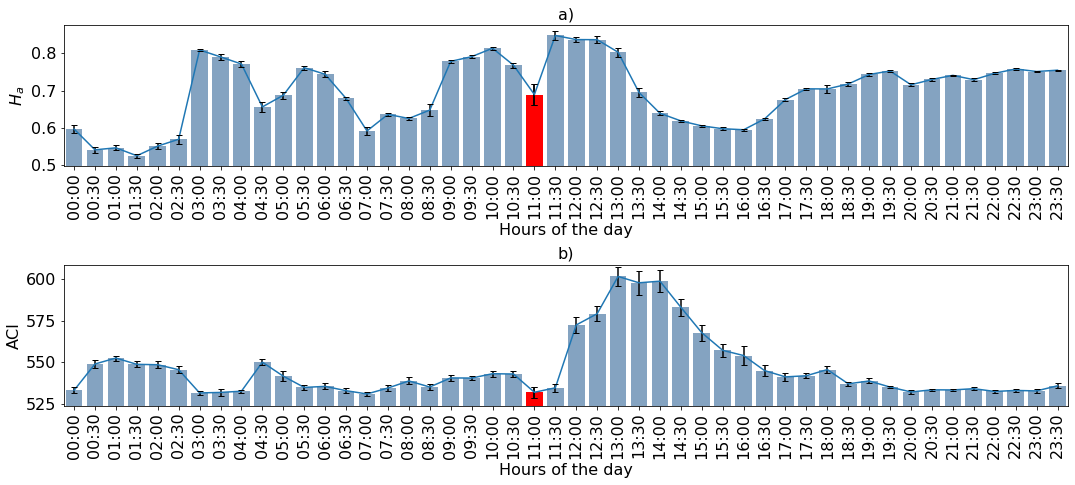

In [7]:
plt.figure(figsize=(18,7))
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)

rain_bar = 22

plt.subplots_adjust(hspace = 0.7)

plt.subplot(2,1,1)
plt.plot(AEI_mu)
plt.bar(np.arange(len(AEI_mu)), AEI_mu, width=0.8, yerr=AEI_CI, capsize=3, tick_label = t, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(rain_bar, AEI_mu[rain_bar], width=0.8, yerr=AEI_CI[rain_bar], capsize=3, color='red')
plt.xlim([-0.5, 47.5])
plt.ylim([np.min(AEI_mu)-np.max(AEI_CI),np.max(AEI_mu)+np.max(AEI_CI)])
plt.xlabel('Hours of the day')
plt.ylabel(r'$H_a$')
plt.title("a)")
plt.xticks(rotation=90)
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)

plt.subplot(2,1,2)
plt.plot(ACI_mu)
plt.bar(np.arange(len(ACI_mu)), ACI_mu, width=0.8, yerr=ACI_CI, capsize=3, tick_label = t, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(rain_bar, ACI_mu[rain_bar], width=0.8, yerr=ACI_CI[rain_bar], capsize=3, color='red')
plt.xlim([-0.5, 47.5])
plt.ylim([np.min(ACI_mu)-np.max(ACI_CI),np.max(ACI_mu)+np.max(ACI_CI)])
plt.ylabel('ACI')
plt.xlabel('Hours of the day')
plt.title("b)")
plt.xticks(rotation=90)
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)

# plt.savefig('../figures/Fig13.eps', format="eps", bbox_inches='tight')

plt.show()